In [76]:
import stream as st
st.__version__

'1.0'

In [ ]:
import scanpy
import pandas as pd

In [77]:
st.set_figure_params(dpi=80,style='white',figsize=[5.4,4.8],
                     rc={'image.cmap': 'viridis'})

### No cluster 8

In [214]:
adata=st.read(file_name='/data/Integration_APE_pos_APE_neg/input_matrix_traj.tsv',workdir='/data/Integration_APE_pos_APE_neg')

Saving results in: /data/Integration_APE_pos_APE_neg


In [215]:
df = pd.read_csv("obs.csv",sep=",",header=0,index_col=0)

In [216]:
adata.obs['desc_0.4'] = df['desc_0.4']

In [217]:
adata.var_names_make_unique()

In [218]:
adata_sub = adata[adata.obs['desc_0.4'].isin([0,1, 2, 3,4,5,6,7]),:]

In [219]:
st.cal_qc(adata_sub,assay='rna')

Trying to set attribute `.var` of view, making a copy.


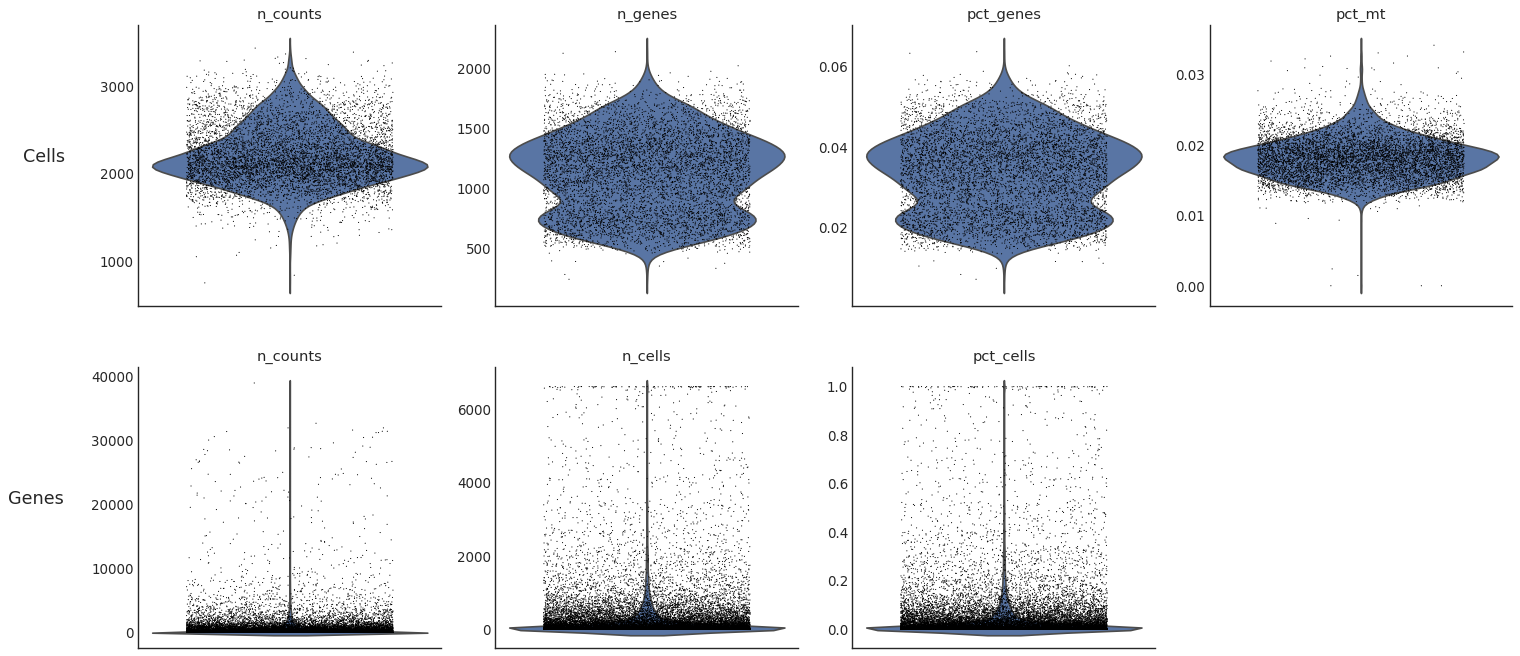

In [220]:
st.plot_qc(adata_sub,jitter=0.3,)

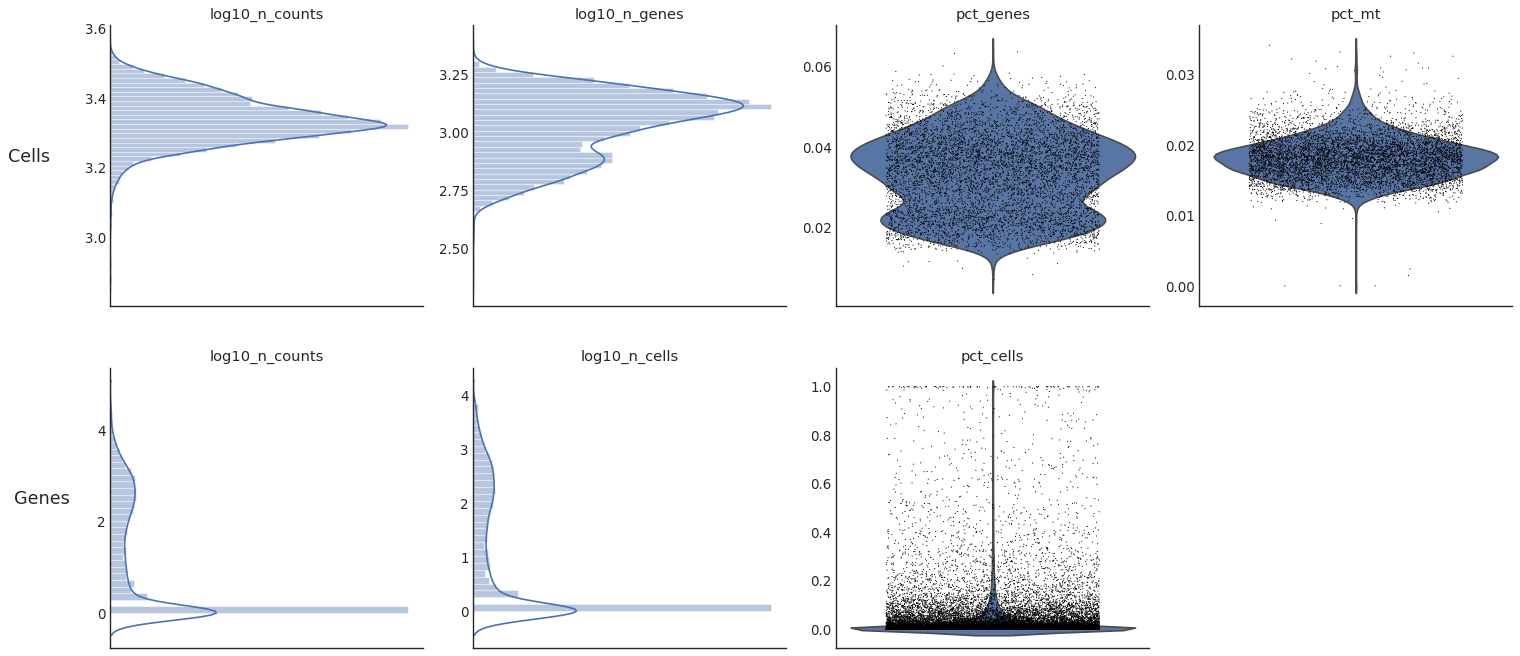

In [221]:
### histogram plots and log-scale are also supported
st.plot_qc(adata_sub,jitter=0.3,log_scale=[0,1,4,5],hist_plot=[0,1,4,5]) 

In [222]:
st.filter_cells(adata_sub,min_n_features= 100)
st.filter_features(adata_sub,min_n_cells = 5)

filter cells based on min_n_features
after filtering out low-quality cells: 
6630 cells, 33538 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
6630 cells, 15363 genes


In [223]:
###Normalize gene expression based on library size  
st.normalize(adata_sub,method='lib_size')
###Logarithmize gene expression 
st.log_transform(adata_sub)
###Remove mitochondrial genes 
st.remove_mt_genes(adata_sub)

remove mitochondrial genes:
['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB']


768 variable genes are selected


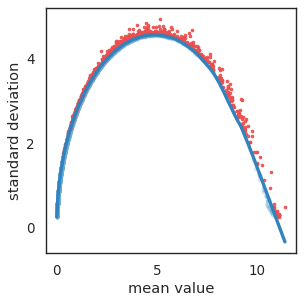

In [224]:
st.select_variable_genes(adata_sub,loess_frac=0.01,percentile=95)

In [225]:
#color = {'C0' : '#e41a1c','C1' : '#377eb8','C2' : '#4daf4a','C3': '#984ea3','C4': '#ff7f00','C5': '#ffff33','C6':'#a65628','C7': '#f781bf'}

In [226]:
#adata_sub.uns['desc_0.4_colors'] = color

In [227]:
adata_sub.obs['desc_0.4'] = adata_sub.obs['desc_0.4'].astype('category')

In [228]:
import scanpy

adata_sub.rename_categories('desc_0.4', ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'])

In [229]:
st.dimension_reduction(adata_sub,method='se',
                       feature='var_genes',
                       n_neighbors=50,
                       n_components=4,
                       n_jobs=10)

feature var_genes is being used ...
10 cpus are being used ...


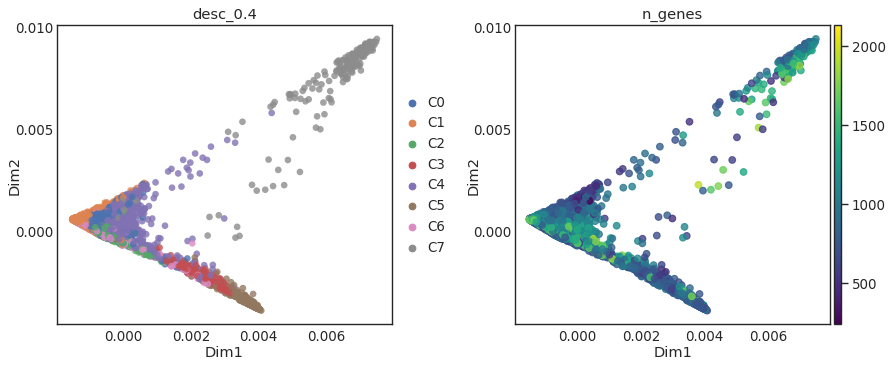

In [230]:
st.plot_dimension_reduction(adata_sub,color=['desc_0.4','n_genes'],
                            n_components=2,show_graph=False,show_text=False)

In [231]:
st.seed_elastic_principal_graph(adata_sub,n_clusters=8)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 8
Calculatng minimum spanning tree...
Number of initial branches: 5


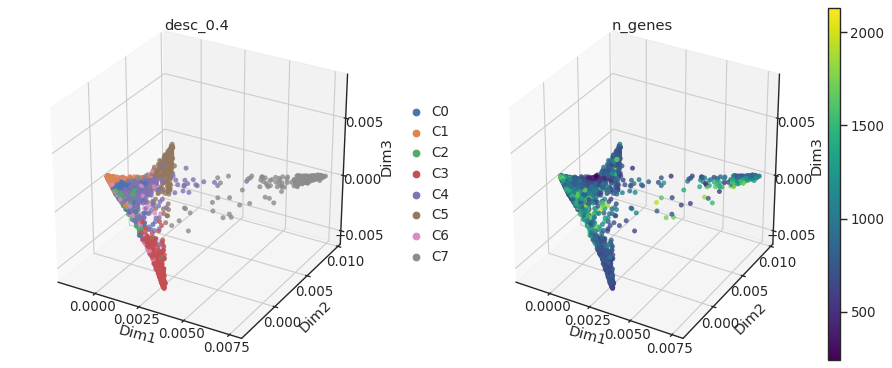

In [232]:
st.plot_dimension_reduction(adata_sub,color=['desc_0.4','n_genes'],
                            n_components=3,show_graph=False,show_text=False)

In [233]:
adata_sub.obs['desc_0.4'].value_counts()

C0    1755
C2    1293
C1    1226
C4     774
C3     541
C6     518
C5     328
C7     195
Name: desc_0.4, dtype: int64

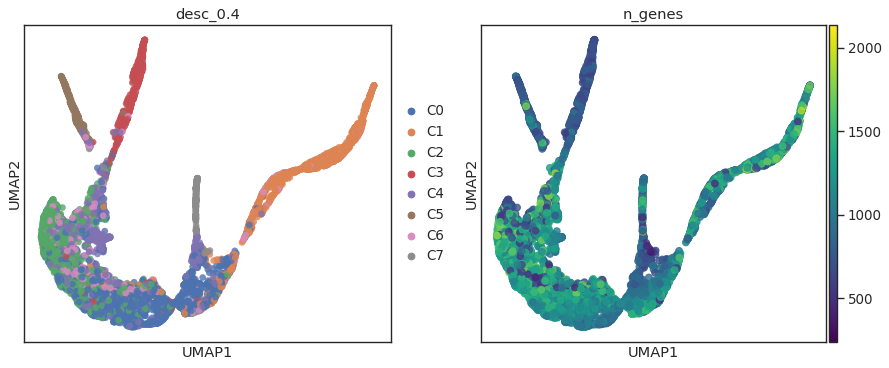

In [234]:
st.plot_visualization_2D(adata_sub,method='umap',n_neighbors=50,
                         color=['desc_0.4','n_genes'],use_precomputed=False)

In [235]:
st.seed_elastic_principal_graph(adata_sub,n_clusters=8,use_vis=True)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 8
Calculatng minimum spanning tree...
Number of initial branches: 1


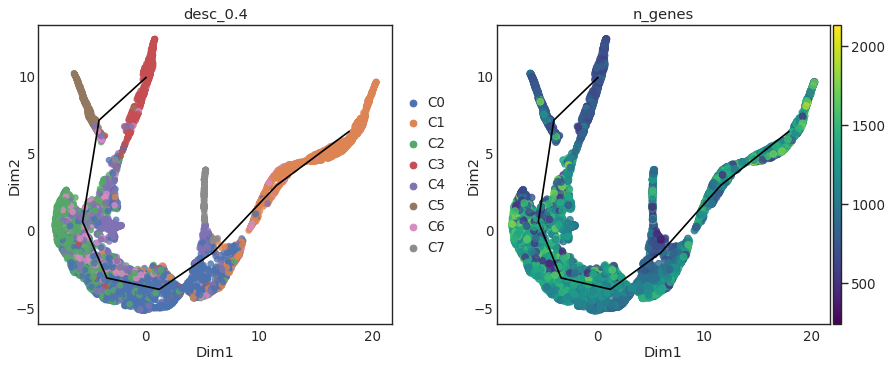

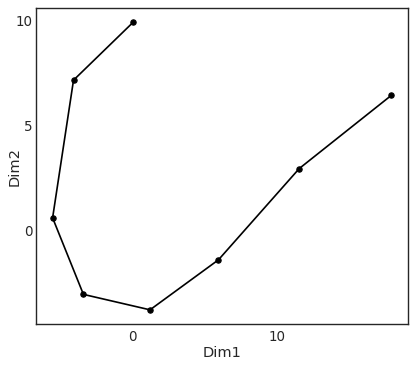

In [236]:
st.plot_dimension_reduction(adata_sub,color=['desc_0.4','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata_sub,show_text=False)

In [237]:
st.elastic_principal_graph(adata_sub,epg_alpha=0.01,epg_mu=0.05,epg_lambda=0.01)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 6630 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
8
 
9
 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

3||50
	
1.363
	
50
	
49
	
42
	
3
	
0
	
0
	
0.6738
	
0.5883
	
0.9911
	
0.9922
	
0.6097
	
0.07999
	
3.999
	
200
	
0


18.734 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 7


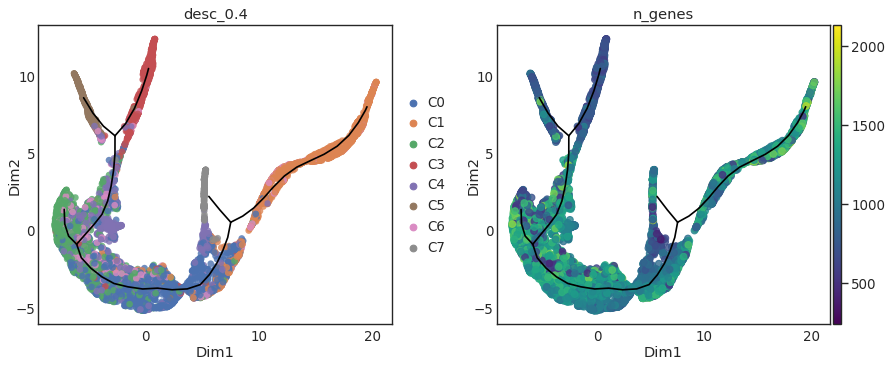

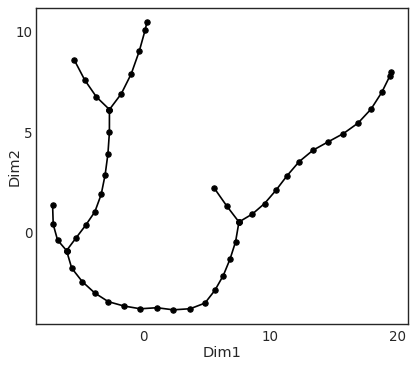

In [238]:
st.plot_dimension_reduction(adata_sub,color=['desc_0.4','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata_sub,show_text=False)

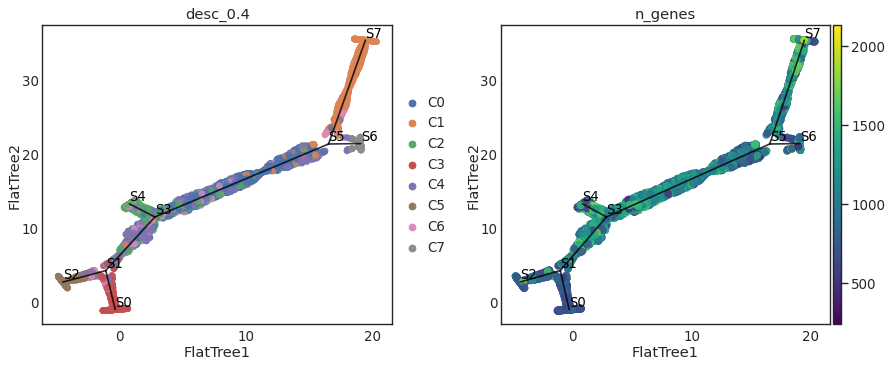

In [239]:
st.plot_flat_tree(adata_sub,color=['desc_0.4','n_genes'],
                  dist_scale=0.5,show_graph=True,show_text=True)

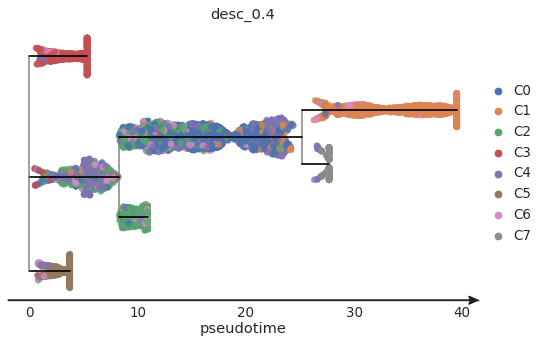

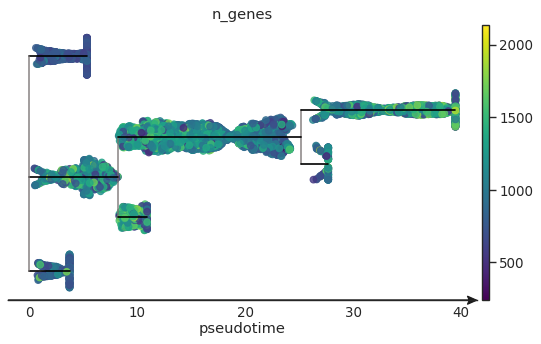

In [240]:
st.plot_stream_sc(adata_sub,root='S1',color=['desc_0.4','n_genes'],
                  dist_scale=0.5,show_graph=True,show_text=False)

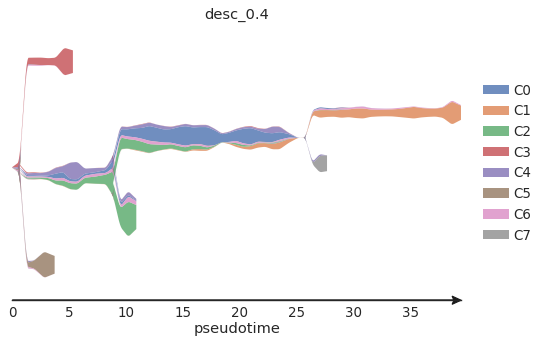

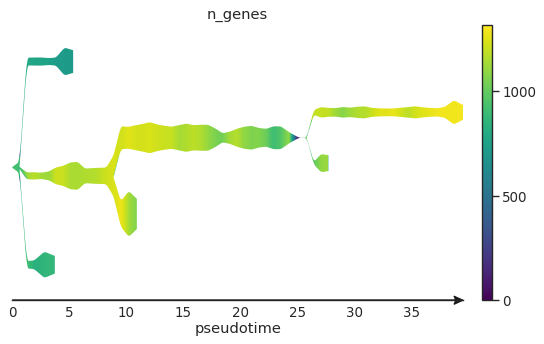

In [241]:
st.plot_stream(adata_sub,root='S1',color=['desc_0.4','n_genes'])

### 1) detect marker genes for each leaf branch

In [242]:
st.detect_leaf_markers(adata_sub,marker_list=adata_sub.uns['var_genes'],cutoff_zscore=1.0,cutoff_pvalue=0.01,
                       root='S1',n_jobs=10)

Scanning the specified marker list ...
Filtering out markers that are expressed in less than 5 cells ...
10 cpus are being used ...
768 markers are being scanned ...


In [243]:
adata_sub.uns['leaf_markers_all'].head()

,zscore,H_statistic,H_pvalue,S1S0_pvalue,S5S7_pvalue,S5S6_pvalue,S3S4_pvalue,S1S2_pvalue
KLRB1,1.99999,1840.48,0,0,0,1,0,0
IL7R,1.99997,2243.54,0,0,0,1,0,0
C1QTNF4,1.99954,1745.56,0,0,0,8.89409e-235,1,0
CLEC9A,1.99238,2007.53,0,1,0,0,0,0
IGHM,1.97359,1542.97,0,0,0,1.27266e-136,1,8.64996e-271


### 2) detect transition genes for each branch

In [244]:
st.detect_transition_markers(adata_sub,marker_list=adata_sub.uns['var_genes'],cutoff_spearman=0.4,cutoff_logfc=0.25,
                             root='S1',n_jobs=4)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
768 markers are being scanned ...


In [245]:
adata_sub.uns['transition_markers'][('S1','S0')].head()

,stat,logfc,pval,qval
HSPA1B,0.540143,1.437014,3.268191e-39,1.085039e-36
HSPA1A,0.529877,1.305263,1.537652e-37,2.552502e-35
HLA-DQA2,0.503356,0.897418,1.787751e-33,1.978444e-31
BCL2A1,0.429847,0.667754,6.683671e-24,5.547447e-22


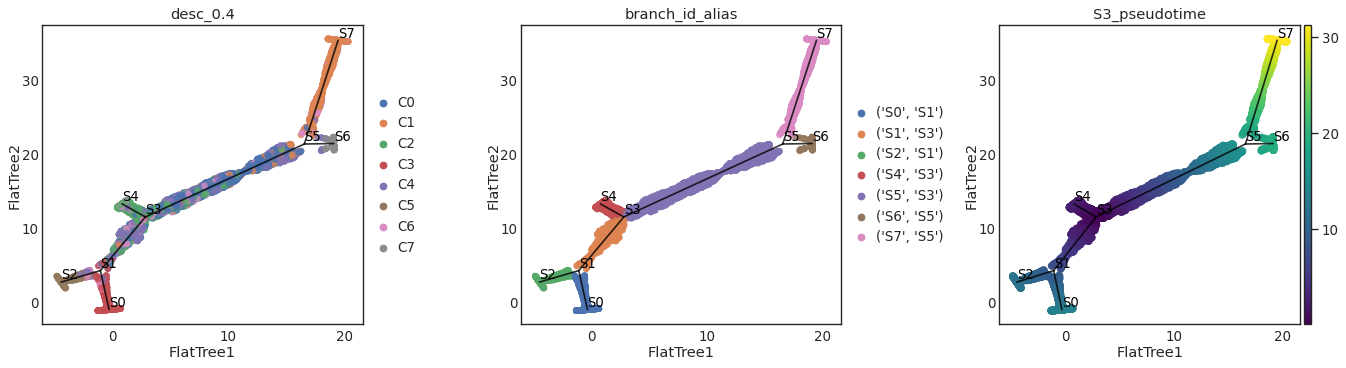

In [250]:
st.plot_flat_tree(adata_sub,color=['desc_0.4','branch_id_alias','S3_pseudotime'],
                  dist_scale=0.5,show_graph=True,show_text=True)

ValueError: min() arg is an empty sequence

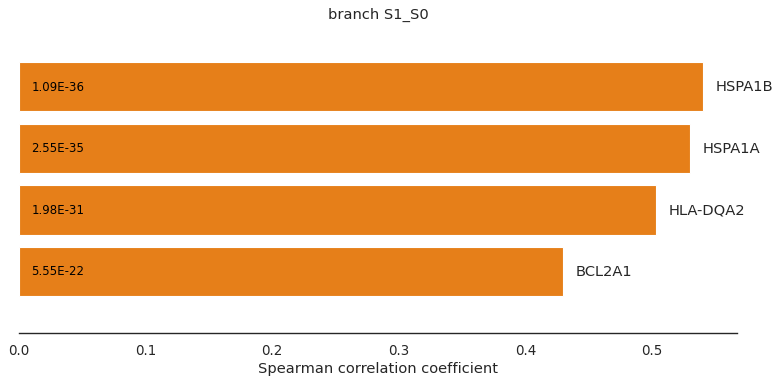

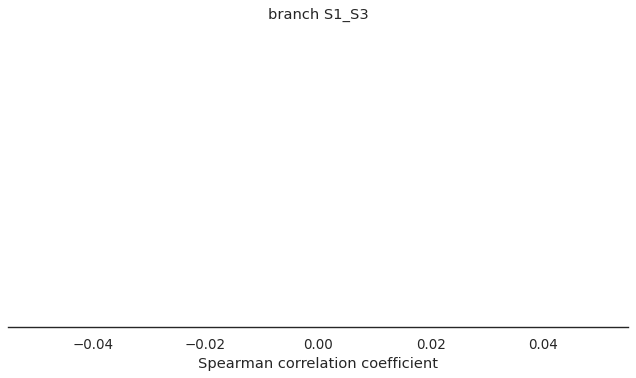

In [247]:
st.plot_transition_markers(adata_sub,fig_size=(10,5))

### 3) detect marker genes that are differentially expressed between pairs of branches

In [248]:
st.detect_de_markers(adata_sub,marker_list=adata_sub.uns['var_genes'],cutoff_zscore=1,cutoff_logfc=0.25,
                     root='S1',n_jobs=4)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
768 markers are being scanned ...


In [254]:
adata_sub.uns['de_markers_greater'][(('S1', 'S3'), ('S3', 'S4'))].head()

,z_score,U,logfc,mean_up,mean_down,pval,qval
IRF8,11.398923,346027.0,3.360660,0.205252,0.019796,4.238038e-30,1.576550e-27
JCHAIN,8.326139,329015.0,2.089673,0.165344,0.038718,8.359396e-17,3.109695e-15
LTB,8.117900,345590.0,0.851923,0.341500,0.189054,4.745967e-16,1.471250e-14
LGALS2,7.401925,311524.0,5.742649,0.073489,0.001300,1.343866e-13,2.631147e-12
LSP1,7.335810,346145.0,0.441948,0.475550,0.349946,2.204888e-13,3.905801e-12


In [256]:
#adata_sub.uns['de_markers_less'][(('S3', 'S4'), ('S3', 'S5'))].head()

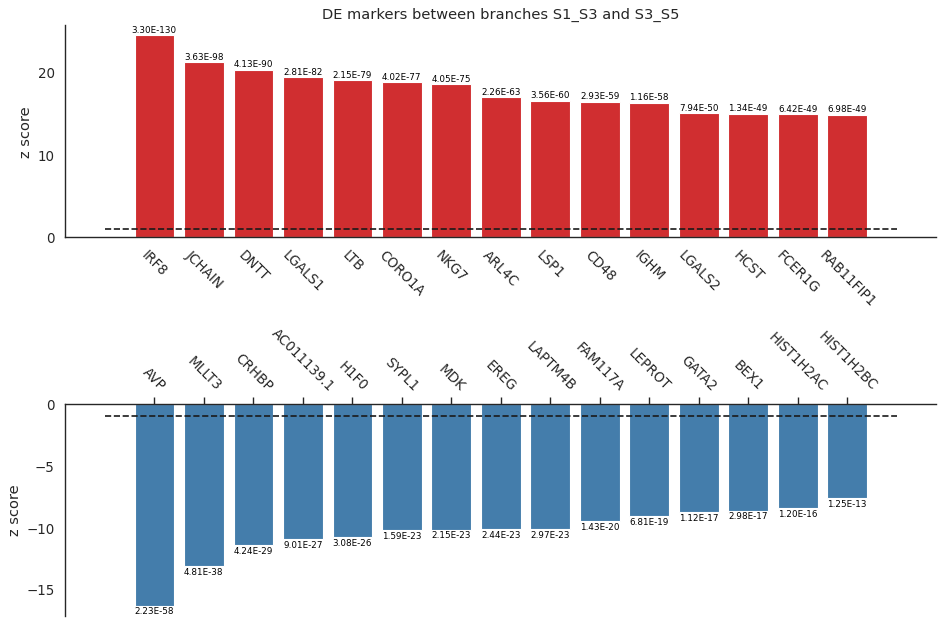

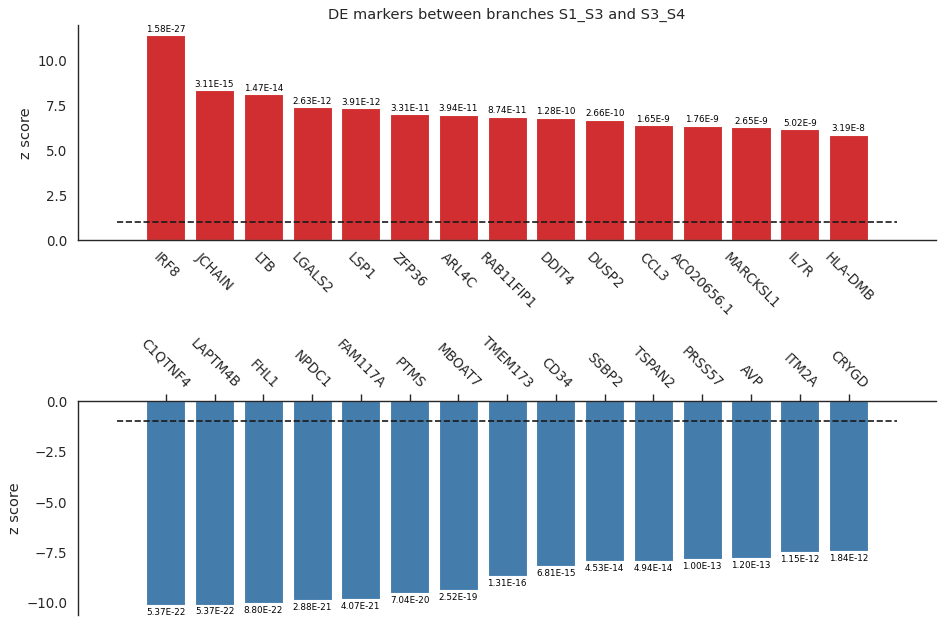

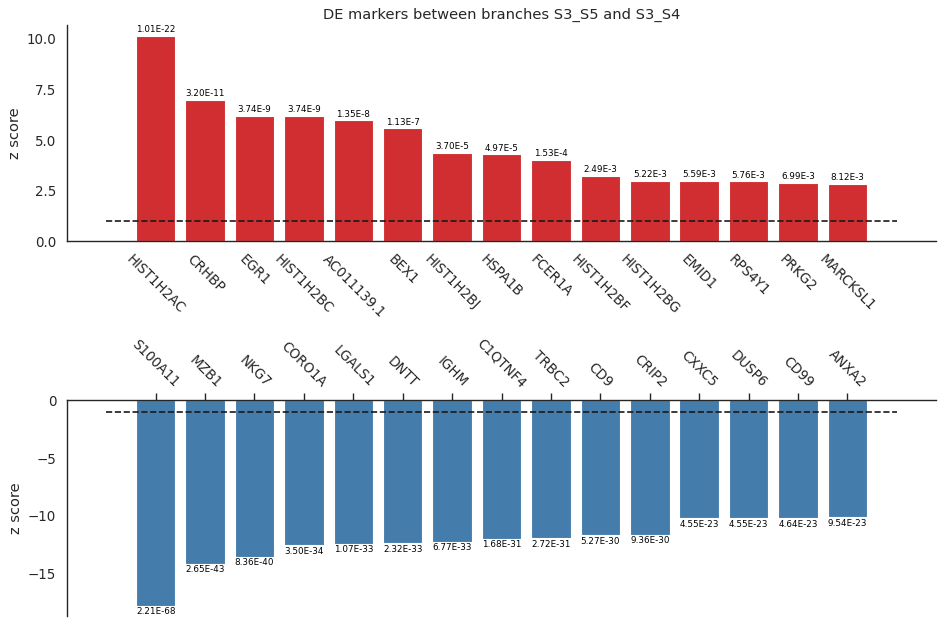

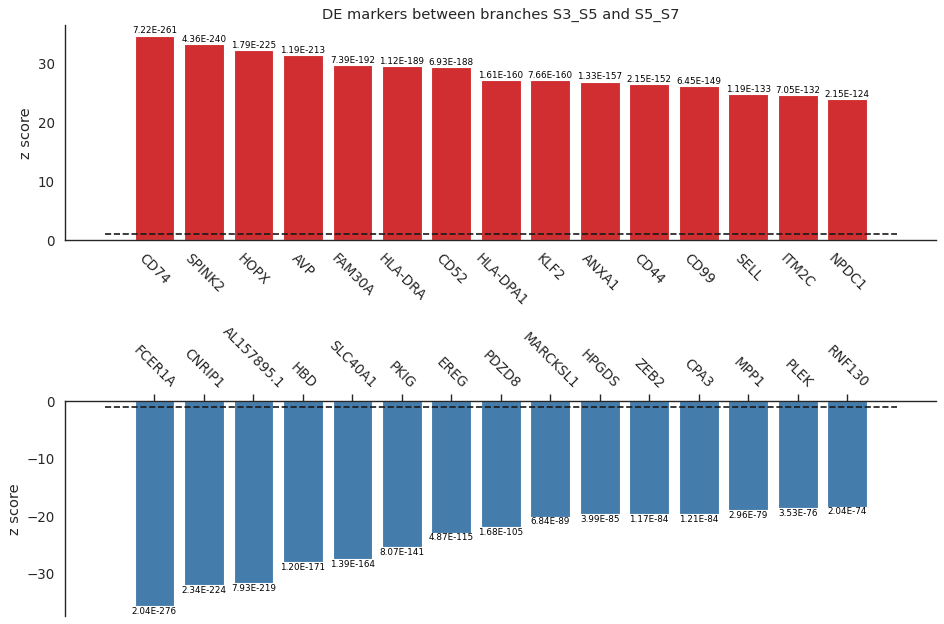

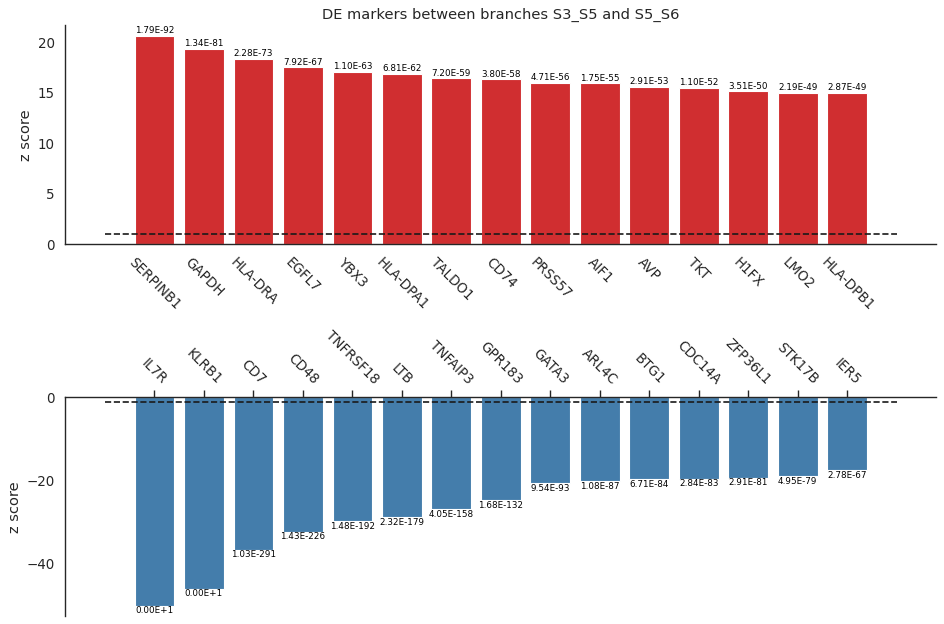

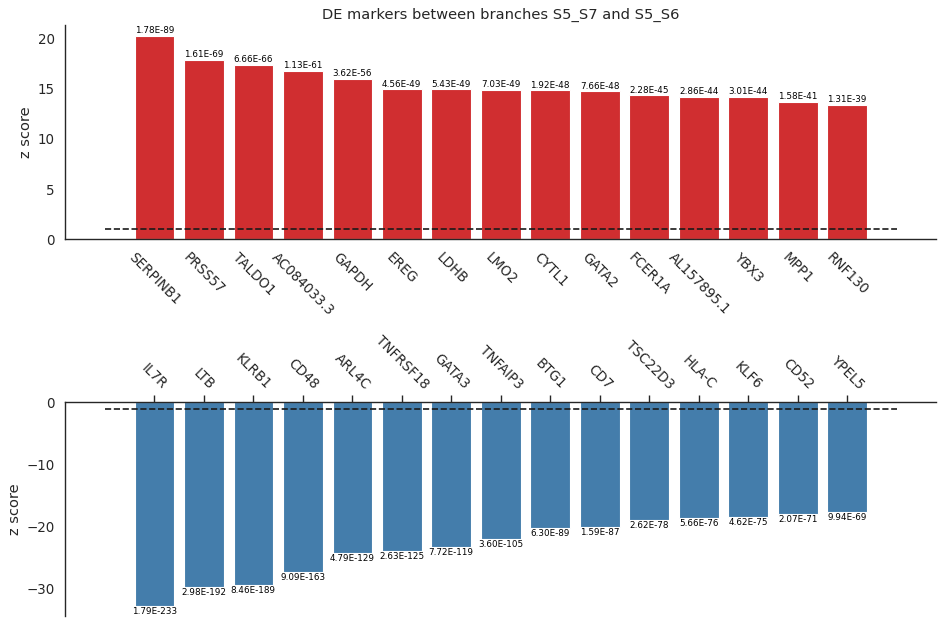

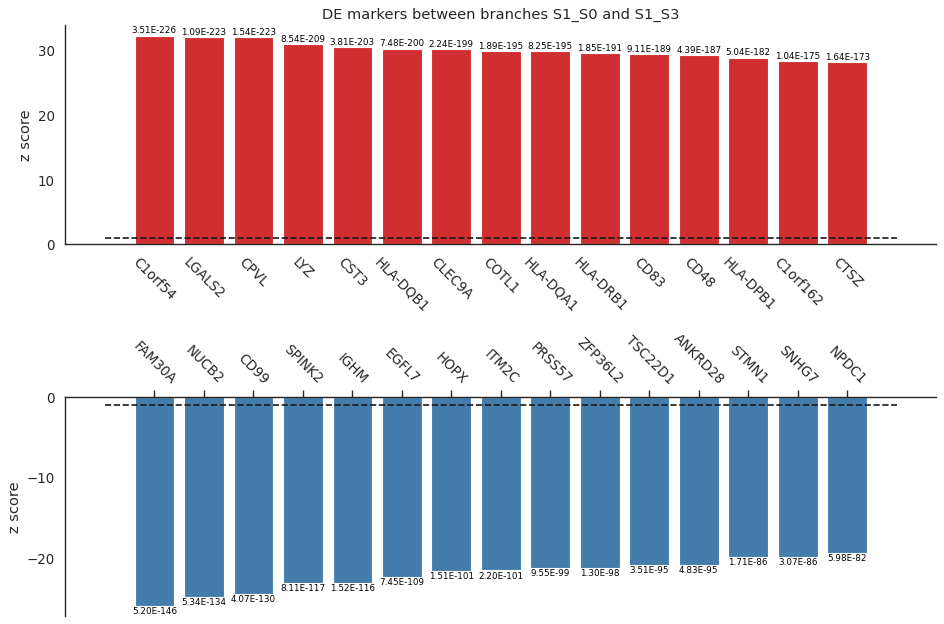

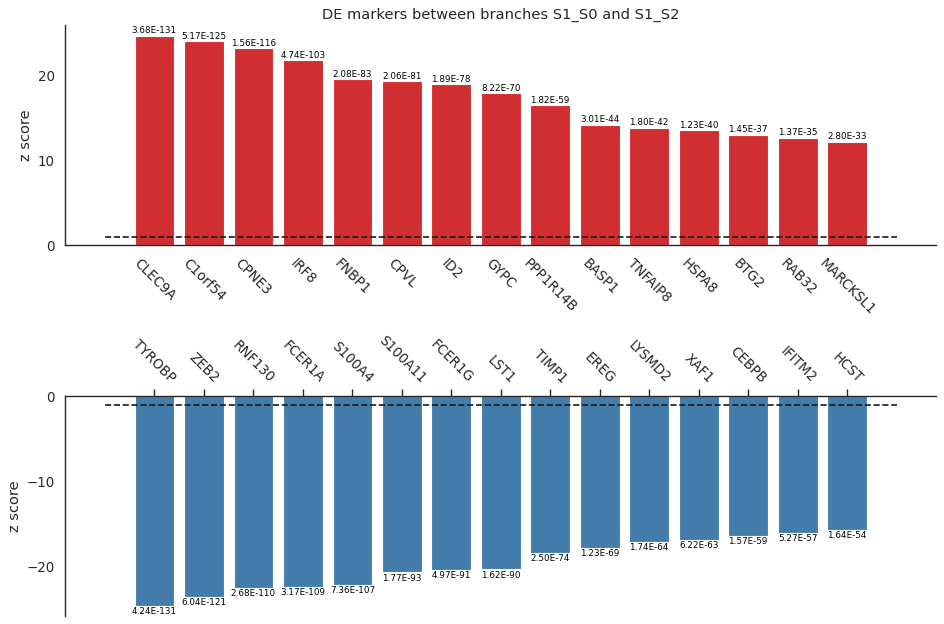

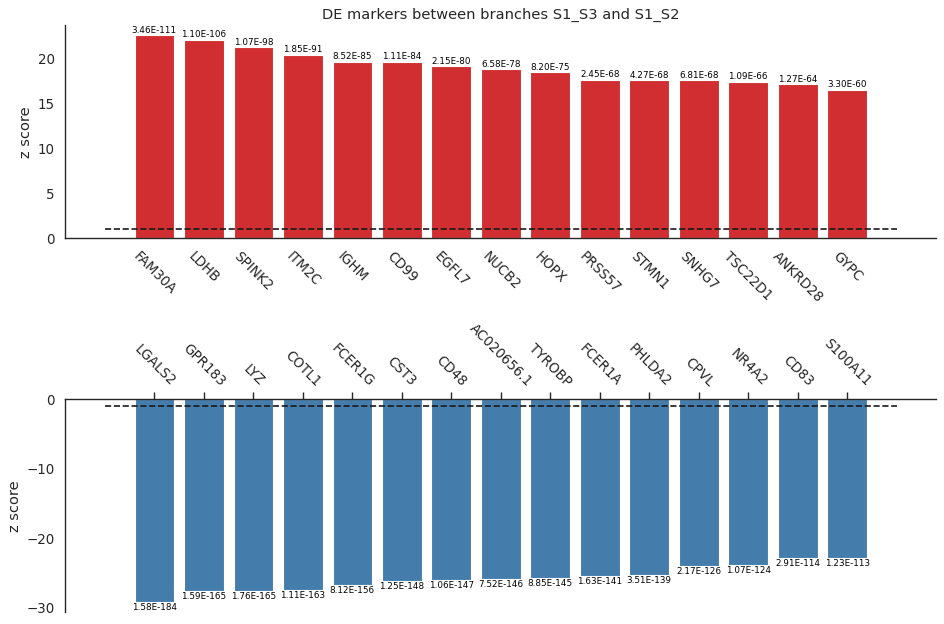

In [257]:
st.plot_de_markers(adata_sub)

### 4) detect cell population-specific markers

In [258]:
st.detect_markers(adata_sub,ident='desc_0.4',marker_list=adata_sub.uns['var_genes'],cutoff_zscore=1.0,cutoff_pvalue=0.01)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
768 markers are being scanned ...


In [259]:
st.write(adata,file_name='stream_result_nocluster8.pkl')

In [263]:
adata_sub.uns['markers_desc_0.4']

{'C0':              zscore H_statistic      H_pvalue            C1            C2  \
 AVP         1.96349     2486.12             0             0   4.65939e-98   
 MALAT1      1.64198     3033.42             0  1.31451e-134  8.61004e-282   
 RPS24       1.48889     3012.41             0   3.7681e-174  1.84477e-239   
 RPL30       1.46603     3048.73             0  5.44893e-194  3.78954e-265   
 JUN         1.42728     2478.22             0   2.34866e-62  1.00205e-198   
 RPL11       1.41253     3176.68             0  5.68332e-212  2.89054e-276   
 RPL5        1.39444     3120.98             0  3.03756e-124  5.90785e-221   
 RPS23        1.3886     3033.39             0  3.00718e-172  7.84332e-247   
 RPL15       1.36171     3016.32             0  2.31807e-111   4.0939e-207   
 RPS6        1.35249     3034.44             0  1.24902e-140  6.94046e-238   
 RPS4X       1.34623     3323.98             0  6.14708e-205  1.05087e-256   
 TPT1        1.31913      3464.1             0            